In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
import utils_qm as uqm
import bt_tools as bt

In [2]:
data = pd.read_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/energies_homolytic.csv')
data_2 = data.loc[(data['Z1'] <= 9) & (data['Z2'] <= 9)].to_dict('list')
data_3 = data.loc[(data['Z1'] >= 14) & (data['Z2'] >= 14) & (data['Z1'] <= 17) & (data['Z2'] <= 17)].to_dict('list')
data_4 = data.loc[(data['Z1'] >= 32) & (data['Z2'] >= 32) & (data['Z1'] <= 35) & (data['Z2'] <= 35)].to_dict('list')
data_234 = data.loc[(data['Z1'] <= 9) & (data['Z2'] <= 9) | (data['Z1'] >= 14) & (data['Z2'] >= 14) & (data['Z1'] <= 17) & (data['Z2'] <= 17) | (data['Z1'] >= 32) & (data['Z2'] >= 32) & (data['Z1'] <= 35) & (data['Z2'] <= 35)].to_dict('list')

for d in [data_2, data_3, data_4, data_234]:
    d['unit'] = 630
    d['bfe type'] = 'homo'
    #d['nbfe'] = np.array(d['Z1'])*np.array(d['Z2'])-(np.array(d['Z1'])+np.array(d['Z2']))

In [3]:
data_3['Z1']

[14.0, 14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 16.0, 16.0, 17.0]

In [21]:
# non-linear fits

def non_linear_model(var, a, b, c):
    Z1, Z2 = var.T
    ebfe = -a**2 - b**2*Z1*Z2 -c**2*(Z1**(7/3)+Z2**(7/3))#(-beta*(Z1**(7/3)+Z2**(7/3))+alpha-b_prime*Z1*Z2)
    return(ebfe)

# do linear fits
b2_nl = bt.BDE_clean.fromdict(data_2)
b3_nl = bt.BDE_clean.fromdict(data_3)
b4_nl = bt.BDE_clean.fromdict(data_4)

for b in [b2_nl, b3_nl, b4_nl]:
    b.fit(non_linear_model)
    #print('MAE = ' + str((np.abs(b.bde-b.bde_fitted)).mean()))
    rounded_MAE = np.round((np.abs(b.bde-b.bde_fitted)).mean(),2)
    rounded_MAE_std = np.round(rounded_MAE/b.bde.std(), 2)
    print(f'MAE = {rounded_MAE} ({rounded_MAE_std})')

MAE = 5.86 (0.15)
MAE = 2.35 (0.17)
MAE = 2.17 (0.21)


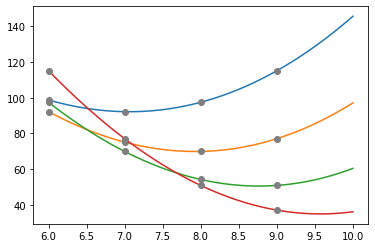

In [5]:
Z_min = []
E_AB_min = []
for ZA in [6,7,8,9]:
    ZB = np.linspace(6, 10, 50)

    E_AB = lambda ZA, ZB: 215.74332000106375 - 10.469961149340747*ZA*ZB + 1.9867938214098277*(ZA**(7/3)+ZB**(7/3))
    
    Z_min.append( ZB[np.where(E_AB(ZA, ZB) == np.amin(E_AB(ZA, ZB)))[0]][0])
    E_AB_min.append(np.amin(E_AB(ZA, ZB)))
    plt.plot(ZB, E_AB(ZA, ZB))
    
    for i in [6,7,8,9]:
        plt.plot(i, E_AB(ZA, i), 'o', color = 'tab:gray')

#plt.plot(Z_min, E_AB_min, '--o', color = 'black')

Text(0, 0.5, '$E_{\\rm{AB}}$ (kcal/mol)')

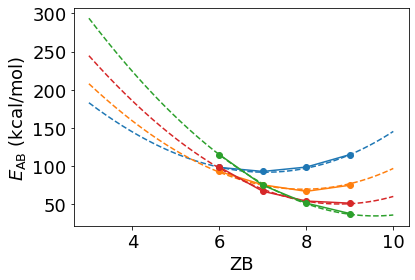

In [6]:
plt.rcParams['font.size'] = 18

Z_min = []
E_AB_min = []
for ZA in [6,7,8,9]:
    ZB = np.linspace(3, 10, 500)

    E_AB = lambda ZA, ZB: 215.74332000106375 - 10.469961149340747*ZA*ZB + 1.9867938214098277*(ZA**(7/3)+ZB**(7/3))
    
    Z_min.append( ZB[np.where(E_AB(ZA, ZB) == np.amin(E_AB(ZA, ZB)))[0]][0])
    E_AB_min.append(np.amin(E_AB(ZA, ZB)))
    
    if ZA == 6:
        color = 'tab:blue'
    elif ZA == 7:
        color = 'tab:orange'
    elif ZA == 8:
        color = 'tab:red'
    elif ZA == 9:
        color = 'tab:green'
    
    plt.plot(ZB, E_AB(ZA, ZB), '--',color = color)
    
#     for i in [6,7,8,9]:
#         plt.plot(i, E_AB(ZA, i), 'o', color = 'tab:gray')

#plt.plot(Z_min, E_AB_min, '--o', color = 'black')

for ZA in [6,7,8,9]:
    E_AB = []
    for ZB in [6,7,8,9]:
        
        try:
            E_AB.append(data.loc[(data['Z1']==ZA) & ((data['Z2']==ZB)), 'bfe'].item())
        except ValueError:
            E_AB.append(data.loc[(data['Z1']==ZB) & ((data['Z2']==ZA)), 'bfe'].item())
            
    E_AB = -630*np.array(E_AB)
    if ZA == 6:
        color = 'tab:blue'
    elif ZA == 7:
        color = 'tab:orange'
    elif ZA == 8:
        color = 'tab:red'
    elif ZA == 9:
        color = 'tab:green'
    plt.plot([6,7,8,9], E_AB, '-o', color = color, label = f'ZA = {ZA}')
    
plt.xlabel('ZB')
plt.ylabel(r'$E_{\rm{AB}}$ (kcal/mol)')
#plt.legend(bbox_to_anchor = (1.05,1))

#plt.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

(35.0, 120.0)

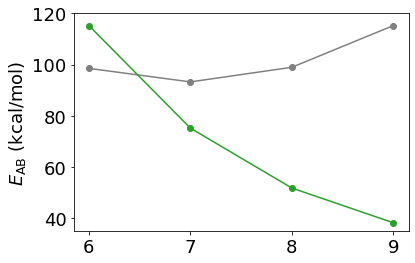

In [7]:
for ZA in [6,7,8,9]:
    E_AB = []
    for ZB in [6,7,8,9]:
        
        try:
            E_AB.append(data.loc[(data['Z1']==ZA) & ((data['Z2']==ZB)), 'bfe'].item())
        except ValueError:
            E_AB.append(data.loc[(data['Z1']==ZB) & ((data['Z2']==ZA)), 'bfe'].item())
            
    E_AB = -630*np.array(E_AB)
    if ZA == 6:
        plt.plot([6,7,8,9], E_AB, '-o', color = 'gray')
    if ZA == 9:
        plt.plot([6,7,8,9], E_AB, '-o', color = 'tab:green')
#plt.xlabel('ZB')
plt.ylabel(r'$E_{\rm{AB}}$ (kcal/mol)')

plt.ylim([35,120])

(35.0, 120.0)

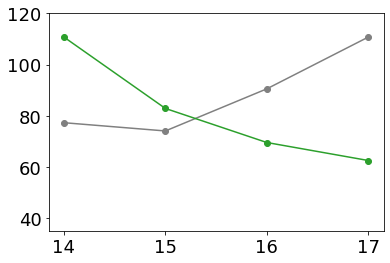

In [8]:
for ZA in [14,15,16,17]:
    E_AB = []
    for ZB in [14,15,16,17]:
        
        try:
            E_AB.append(data.loc[(data['Z1']==ZA) & ((data['Z2']==ZB)), 'bfe'].item())
        except ValueError:
            E_AB.append(data.loc[(data['Z1']==ZB) & ((data['Z2']==ZA)), 'bfe'].item())
            
    E_AB = -630*np.array(E_AB)
    
    if ZA == 14:
    
        plt.plot([14,15,16,17], E_AB, '-o', color = 'gray')
    if  ZA == 17:
        plt.plot([14,15,16,17], E_AB, '-o', color = 'tab:green')
        
plt.ylim([35,120])

(35.0, 120.0)

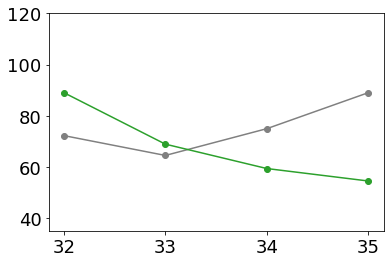

In [9]:
for ZA in [32,33,34,35]:
    E_AB = []
    for ZB in [32,33,34,35]:
        
        try:
            E_AB.append(data.loc[(data['Z1']==ZA) & ((data['Z2']==ZB)), 'bfe'].item())
        except ValueError:
            E_AB.append(data.loc[(data['Z1']==ZB) & ((data['Z2']==ZA)), 'bfe'].item())
            
    E_AB = -630*np.array(E_AB)
    if ZA == 32:
        plt.plot([32,33,34,35], E_AB, '-o', color = 'gray')
    if ZA == 35:    
        plt.plot([32,33,34,35], E_AB, '-o', color = 'tab:green')
        
plt.ylim([35,120])

In [10]:
from scipy.optimize import curve_fit

In [11]:
def non_linear_model_bde(var, a, b, c):
    Z1, Z2 = var.T
    ebfe = a**2 - b**2*Z1*Z2 +c**2*(Z1**(7/3)+Z2**(7/3))
    return(ebfe)

In [12]:
var = b2_nl.xdata
ydata = b2_nl.bde
a = np.sqrt(215)
b = -np.sqrt(10)
c = np.sqrt(2)

af, bf, cf = curve_fit(non_linear_model_bde, var, ydata=ydata, p0=[a,b,c])[0]

In [13]:
(var.T).shape

(2, 15)

103.80335430471197 -0.12294579789735192 1.3132018501311669e-11


/home/sahre/opt/miniconda3/envs/qm-tools/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


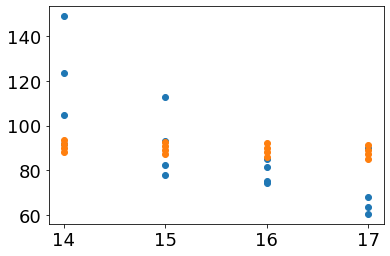

In [14]:
r23 = data.loc[(data['Z1'] >= 6) & (data['Z2'] >= 14) & (data['Z1'] <= 9) & (data['Z2'] <= 17)].to_dict('list')

bde = -630*np.array(r23['bfe'])
xdata = np.array([r23['Z1'], r23['Z2']]).T

a0 = np.sqrt(1000)
b0 = np.sqrt(15)
c0 = np.sqrt(1)
a, b, c = curve_fit(non_linear_model_bde, xdata, ydata=bde, p0=[a0,b0,c0])[0]

print(a**2, -b**2, c**2)
bde_fit = non_linear_model_bde(xdata, a, b, c)

plt.plot(xdata[:,1], bde, 'o')
plt.plot(xdata[:,1], bde_fit, 'o')

d_bar = 1.8251409950667044
1153.3968694948742 -22.01419686391041 1.4628465843565024


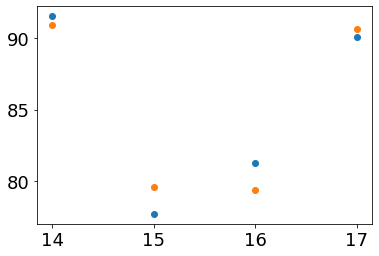

In [15]:
data_sel = data.loc[(data['Z1'] >= 6) & (data['Z2'] >= 14) & (data['Z1'] <= 6) & (data['Z2'] <= 17)].to_dict('list')

bde = -630*np.array(data_sel['bfe'])
#bde = -630*np.array([-0.145329, -0.123292, -0.128947, -0.142969])

xdata = np.array([data_sel['Z1'], data_sel['Z2']]).T
#xdata = np.array([[6, 14], [6, 15], [6, 16], [6, 17]])
a = 1
b = 1
c = 1
a, b, c = curve_fit(non_linear_model_bde, xdata, ydata=bde, p0=[a,b,c])[0]
print('d_bar = ' +str(np.array(data_sel['d']).mean()))
print(a**2, -b**2, c**2)
bde_fit = non_linear_model_bde(xdata, a, b, c)

plt.plot(xdata[:,1], bde, 'o')
plt.plot(xdata[:,1], bde_fit, 'o')

d_bar = 1.7098253638827245
998.468760152927 -15.142755761156868 1.041847991112619


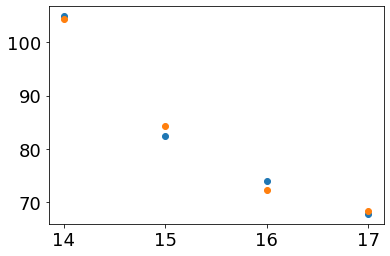

In [16]:
data_sel = data.loc[(data['Z1'] >= 7) & (data['Z2'] >= 14) & (data['Z1'] <= 7) & (data['Z2'] <= 17)].to_dict('list')

bde = -630*np.array(data_sel['bfe'])
#bde = -630*np.array([-0.145329, -0.123292, -0.128947, -0.142969])

xdata = np.array([data_sel['Z1'], data_sel['Z2']]).T
#xdata = np.array([[6, 14], [6, 15], [6, 16], [6, 17]])
a = 1
b = 1
c = 1
a, b, c = curve_fit(non_linear_model_bde, xdata, ydata=bde, p0=[a,b,c])[0]
print('d_bar = ' +str(np.array(data_sel['d']).mean()))
print(a**2, -b**2, c**2)
bde_fit = non_linear_model_bde(xdata, a, b, c)

plt.plot(xdata[:,1], bde, 'o')
plt.plot(xdata[:,1], bde_fit, 'o')

d_bar = 1.6592014237972628
1078.5740130168213 -13.904689530708323 1.0025015746668853


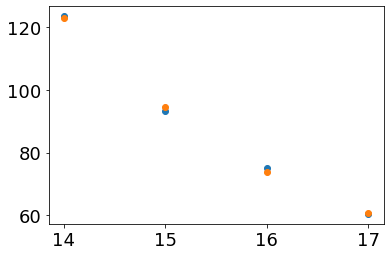

In [17]:
data_sel = data.loc[(data['Z1'] >= 8) & (data['Z2'] >= 14) & (data['Z1'] <= 8) & (data['Z2'] <= 17)].to_dict('list')

bde = -630*np.array(data_sel['bfe'])
#bde = -630*np.array([-0.145329, -0.123292, -0.128947, -0.142969])

xdata = np.array([data_sel['Z1'], data_sel['Z2']]).T
#xdata = np.array([[6, 14], [6, 15], [6, 16], [6, 17]])
a = 1
b = 1
c = 1
a, b, c = curve_fit(non_linear_model_bde, xdata, ydata=bde, p0=[a,b,c])[0]
print('d_bar = ' +str(np.array(data_sel['d']).mean()))
print(a**2, -b**2, c**2)
bde_fit = non_linear_model_bde(xdata, a, b, c)

plt.plot(xdata[:,1], bde, 'o')
plt.plot(xdata[:,1], bde_fit, 'o')

d_bar = 1.6103460342565992
1134.3038369043811 -12.625468707811104 0.9445102618525903


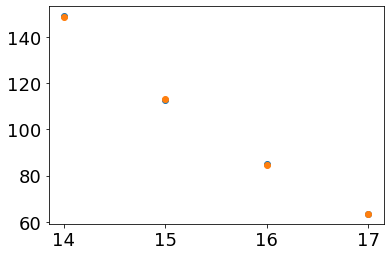

In [18]:
data_sel = data.loc[(data['Z1'] >= 9) & (data['Z2'] >= 14) & (data['Z1'] <= 9) & (data['Z2'] <= 17)].to_dict('list')

bde = -630*np.array(data_sel['bfe'])
#bde = -630*np.array([-0.145329, -0.123292, -0.128947, -0.142969])

xdata = np.array([data_sel['Z1'], data_sel['Z2']]).T
#xdata = np.array([[6, 14], [6, 15], [6, 16], [6, 17]])

a, b, c = curve_fit(non_linear_model_bde, xdata, ydata=bde, p0=[a,b,c])[0]
print('d_bar = ' +str(np.array(data_sel['d']).mean()))
print(a**2, -b**2, c**2)
bde_fit = non_linear_model_bde(xdata, a, b, c)

plt.plot(xdata[:,1], bde, 'o')
plt.plot(xdata[:,1], bde_fit, 'o')

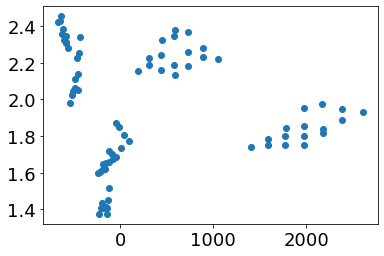

In [19]:
ZA_l = 6
ZA_h = 35
ZB_l = 6
ZB_h = 35

Z1 = np.array(data.loc[(data['Z1'] >= ZA_l) & (data['Z2'] >= ZB_l) & (data['Z1'] <= ZA_h) & (data['Z2'] <= ZB_h)]['Z1'])
Z2 = np.array(data.loc[(data['Z1'] >= ZA_l) & (data['Z2'] >= ZB_l) & (data['Z1'] <= ZA_h) & (data['Z2'] <= ZB_h)]['Z2'])
d = np.array(data.loc[(data['Z1'] >= ZA_l) & (data['Z2'] >= ZB_l) & (data['Z1'] <= ZA_h) & (data['Z2'] <= ZB_h)]['d'])
bfe = np.array(data.loc[(data['Z1'] >= ZA_l) & (data['Z2'] >= ZB_l) & (data['Z1'] <= ZA_h) & (data['Z2'] <= ZB_h)]['bfe'])

plt.plot(-7*Z1*Z2+Z1**(7/3)+Z2**(7/3), d, 'o')


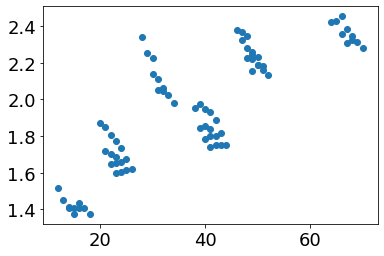

In [20]:
plt.plot(Z1+Z2, d, 'o')

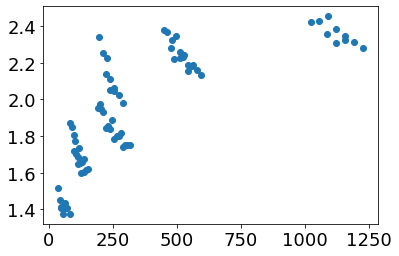

In [21]:
plt.plot(Z1*Z2, d, 'o')

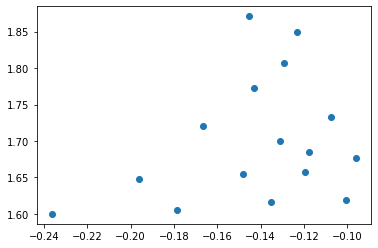

In [138]:
plt.plot(bfe, d, 'o')